In [14]:
import torch
import torchvision
import torchvision.transforms as transforms
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Model, Sequential

In [2]:
(trainset, _), (testset, _) = cifar10.load_data()

In [4]:
trainset = trainset.astype('float32')/255
trainset = trainset.reshape(len(trainset), trainset.shape[1], trainset.shape[2], 3)

In [5]:
testset = testset.astype('float32')/255
testset = testset.reshape(len(testset), testset.shape[1], testset.shape[2], 3)

In [6]:
def show_image(image):
    plt.imshow(image)
    plt.show()

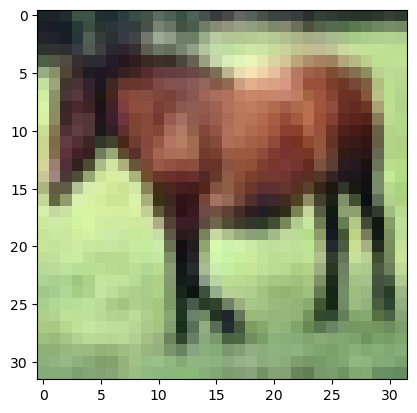

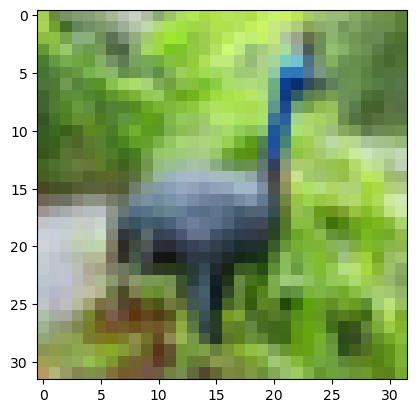

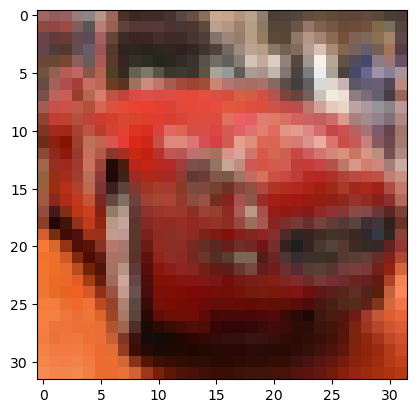

In [7]:
show_image(trainset[7])
show_image(trainset[6])
show_image(trainset[5])

In [8]:
x1 = trainset[2000:3000]
x2 = trainset[3000:4000]

In [9]:
average_x = (x1 + x2) / 2

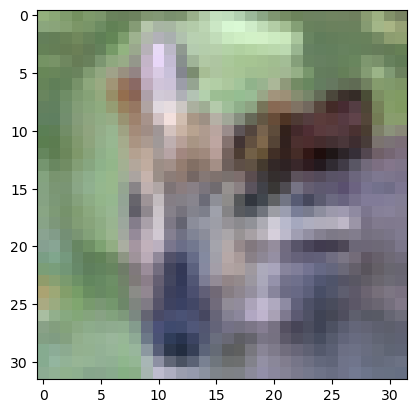

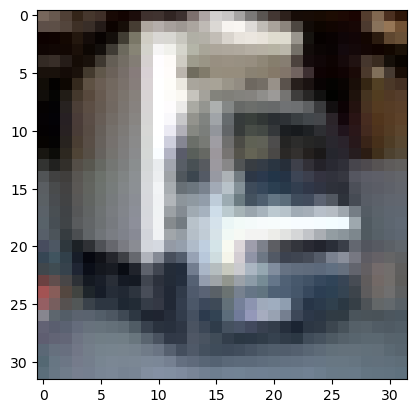

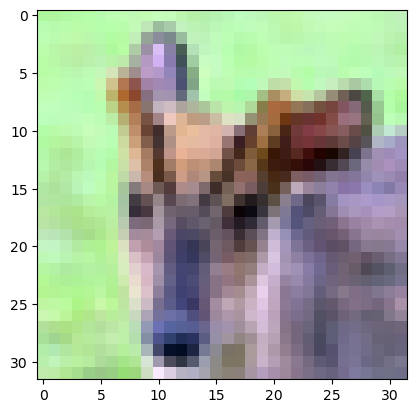

In [10]:
show_image(average_x[1])
show_image(x1[1])
show_image(x2[1])

In [13]:
input_img = Input(shape=(32, 32, 3))

# Encoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)

encoded = MaxPooling2D((2,2), padding='same', name='encoder')(x)

# Decoder1
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

x = Conv2D(16, (3, 3), activation='relu',padding='same')(x)
x = UpSampling2D((2, 2))(x)

decoded1 = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Decoder2
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

x = Conv2D(16, (3, 3), activation='relu',padding='same')(x)
x = UpSampling2D((2, 2))(x)

decoded2 = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

In [15]:
autoencoder = Model(input_img, [decoded1, decoded2])
autoencoder.compile(optimizer='adam', loss='mse')

In [17]:
X_test1 = testset[:500]
X_test2 = testset[500:1000]
input_test = (X_test1 + X_test2)/2

In [18]:
history = autoencoder.fit(average_x, [x1, x2], epochs=50, batch_size=256, 
                          validation_data=(input_test, [X_test1, X_test2]))

Epoch 1/50
4/4 [==============================] - 2s 359ms/step - loss: 0.1306 - conv2d_17_loss: 0.0639 - conv2d_21_loss: 0.0667 - val_loss: 0.1269 - val_conv2d_17_loss: 0.0648 - val_conv2d_21_loss: 0.0622
Epoch 2/50
4/4 [==============================] - 1s 264ms/step - loss: 0.1301 - conv2d_17_loss: 0.0636 - conv2d_21_loss: 0.0665 - val_loss: 0.1266 - val_conv2d_17_loss: 0.0646 - val_conv2d_21_loss: 0.0619
Epoch 3/50
4/4 [==============================] - 1s 269ms/step - loss: 0.1294 - conv2d_17_loss: 0.0632 - conv2d_21_loss: 0.0662 - val_loss: 0.1261 - val_conv2d_17_loss: 0.0646 - val_conv2d_21_loss: 0.0615
Epoch 4/50
4/4 [==============================] - 1s 267ms/step - loss: 0.1286 - conv2d_17_loss: 0.0628 - conv2d_21_loss: 0.0658 - val_loss: 0.1253 - val_conv2d_17_loss: 0.0642 - val_conv2d_21_loss: 0.0611
Epoch 5/50
4/4 [==============================] - 1s 263ms/step - loss: 0.1279 - conv2d_17_loss: 0.0623 - conv2d_21_loss: 0.0656 - val_loss: 0.1244 - val_conv2d_17_loss: 0.0637